### IDs:
Insert yours IDs to the cell below

ID #1: 327156998

ID #2: 


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import rv_discrete
from scipy.stats import binom
from scipy.stats import iqr
from itertools import product

In [3]:
def num_of_samples_for_atleast_one(p_defective, p_atleast_one):
    ## some math
    ## X = B(n, p) --> P(X == k) = (n choose k) * p^k * (1-p)^(n-k)
    ## P(X >= 1) = 1 - P(X == 0) = 1 - (1 - p)^n
    ## p(X >= 1) >= p_atleast_one --> 1 - (1-p)^n >= p_atleast_one --> n = log(1 - p_atleast_one) / log(1-p) 
    n = np.log(1 - p_atleast_one) / np.log (1 - p_defective)
    n = np.ceil(n).astype(int)
    return n

In [4]:
#answer 1.A
ans1A = num_of_samples_for_atleast_one(0.03, 0.85)
print("ans 1.A = {0}".format(ans1A))

ans 1.A = 63


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [5]:
#answer 1.B
ans1B = num_of_samples_for_atleast_one(0.04, 0.95)
print("ans 1.B = {0}".format(ans1B))

ans 1.B = 74


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [6]:

def num_of_samples_for_atleast_X(p_defective, p_atleast_X, k, n_limit = 1000000):
    n = 0
    k = k - 1
    for n in range(n_limit):
        # if P(X >= k) --> 1 - P(X < k) --> 1 - P(X <= k - 1)
        if (1 - binom.cdf(k,n,p_defective) >= p_atleast_X):
            return n
    return -1

In [7]:
#answer 1.C
ans1C1 = num_of_samples_for_atleast_X(0.1, 0.90, 5)
ans1C2 = num_of_samples_for_atleast_X(0.3, 0.90, 15)

print("ans 1.C.1 = {0}".format(ans1C1))
print("ans 1.C.2 = {0}".format(ans1C2))

ans 1.C.1 = 78
ans 1.C.2 = 64


as we saw we need to get: (1 - binom.cdf(k,n,p_defective) >= p_atleast_X).
we know var(binom(n, p)) = np*(1 - p), E(binom(n, p)) = np --> 
so we canclude that we will get different answers

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.
Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [8]:
#create data - Scenario 1
RG = None
RG_mean = None
RG_median = None
RG_population = 22000
SH = None
SH_mean = None
SH_median = None
SH_population = 16000
#create SH
SH = np.array([500, 1700, 3500, 4000, 4500, 4700, 5800, 6200, 15100, 17000])
SH = np.repeat(SH, SH_population / SH.size)
SH = np.sort(SH)
SH_mean = np.mean(SH)
SH_median = np.median(SH)
print("SH Population: {}, SH Median: {}, SH Mean: {}, SH IQR: {}".format(SH.size, SH_median , SH_mean, iqr(SH)))
#create RG
RG = np.array([0, 1000, 2000, 3000, 4000, 4600, 5000, 5600, 6000, 7000, 8000])
RG = np.repeat(RG, RG_population / RG.size)
RG = np.sort(RG)
RG_mean = np.mean(RG)
RG_median = np.median(RG)
print("RG Population: {}, RG Median: {}, RG Mean: {}, RG IQR: {}".format(RG.size, RG_median , RG_mean, iqr(RG)))

SH Population: 16000, SH Median: 4600.0, SH Mean: 6300.0, SH IQR: 2700.0
RG Population: 22000, RG Median: 4600.0, RG Mean: 4200.0, RG IQR: 4000.0


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


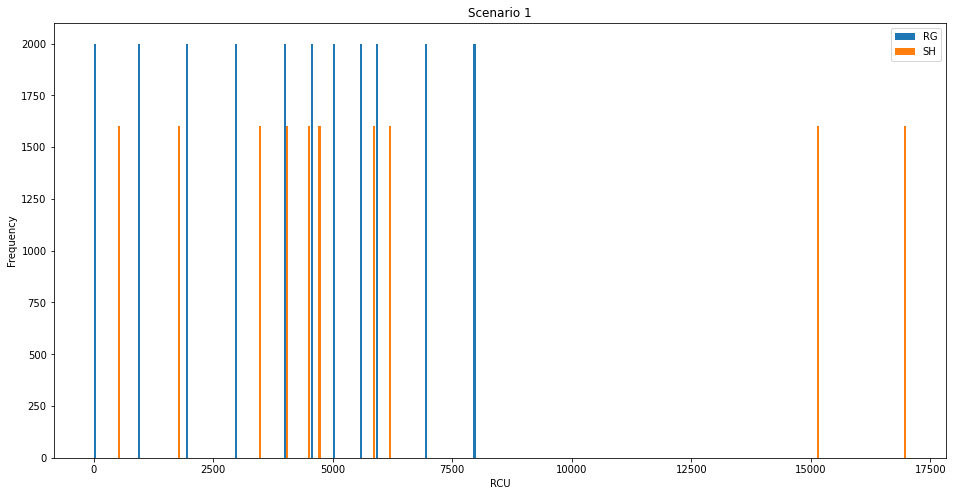

In [9]:
# Scenario 1
figure, ax = plt.subplots(figsize = (16,8))
plt.hist([RG, SH], bins = 150, label = ["RG", "SH"])
plt.title("Scenario 1")
plt.xlabel("RCU")
plt.ylabel("Frequency")  
plt.legend()

In [10]:
#create data - Scenario 2
RG2 = None
RG2_mean = None
RG2_median = None
RG2_population = 22000
SH2 = None
SH2_mean = None
SH2_median = None
SH2_population = 16000
#create SH2
#SH2 = np.array([500, 1700, 3500, 4000, 4500, 4700, 5800, 6200, 15100, 17000])
SH2 = np.array ([1000, 2000, 3000, 4000, 4500, 4700, 5800, 8000, 14000, 15000])
SH2 = np.repeat(SH2, SH2_population / SH2.size)
SH2 = np.sort(SH2)
SH2_mean = np.mean(SH2)
SH2_median = np.median(SH2)
print("SH2 Population: {}, SH2 Median: {}, SH2 Mean: {}, SH2 IQR: {}".format(SH2.size, SH2_median , SH2_mean, iqr(SH2)))
#create RG2
#RG2 = np.array([0, 1000, 2000, 3000, 4000, 4600, 5000, 5600, 6000, 7000, 8000])
RG2 = np.array([100, 200, 1000, 2000, 3000, 4600, 5300, 6000, 7000, 8000, 9000 ])
RG2 = np.repeat(RG2, RG2_population / RG2.size)
RG2 = np.sort(RG2)
RG2_mean = np.mean(RG2)
RG2_median = np.median(RG2)
print("RG2 Population: {}, RG2 Median: {}, RG2 Mean: {}, RG2 IQR: {}".format(RG2.size, RG2_median , RG2_mean, iqr(RG2)))

SH2 Population: 16000, SH2 Median: 4600.0, SH2 Mean: 6200.0, SH2 IQR: 5000.0
RG2 Population: 22000, RG2 Median: 4600.0, RG2 Mean: 4200.0, RG2 IQR: 6000.0


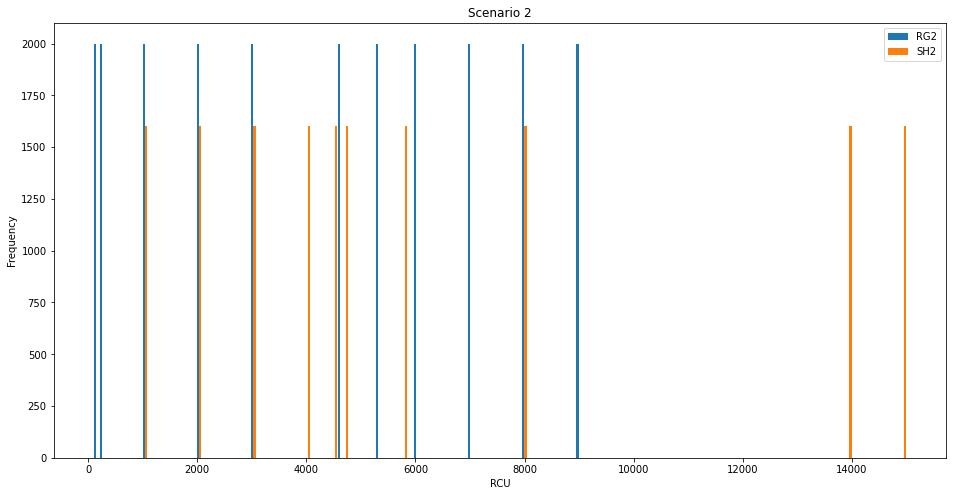

In [11]:
# Scenario 2
figure, ax = plt.subplots(figsize = (16,8))
plt.hist([RG2, SH2], bins = 150, label = ["RG2", "SH2"])
plt.title("Scenario 2")
plt.xlabel("RCU")
plt.ylabel("Frequency")  
plt.legend()

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

In [12]:
#create data - Scenario 3
RG3 = None
RG3_mean = None
RG3_median = None
RG3_population = 22000
SH3 = None
SH3_mean = None
SH3_median = None
SH3_population = 16000
#create SH3
SH3 = np.array([600, 1700, 3500, 4000, 4500, 4700, 5800, 6200, 15000, 17000])
SH3 = np.repeat(SH3, SH3_population / SH3.size)
SH3 = np.sort(SH3)
SH3_mean = np.mean(SH3)
SH3_median = np.median(SH3)
print("SH3 Population: {}, SH3 Median: {}, SH3 Mean: {}, SH3 IQR: {}".format(SH3.size, SH3_median , SH3_mean, iqr(SH3)))
#create RG3
RG3 = np.array([100, 900, 2000, 3000, 4000, 4600, 5000, 5600, 6000, 7000, 8000])
RG3 = np.repeat(RG3, RG3_population / RG3.size)
RG3 = np.sort(RG3)
RG3_mean = np.mean(RG3)
RG3_median = np.median(RG3)
print("RG3 Population: {}, RG3 Median: {}, RG3 Mean: {}, RG3 IQR: {}".format(RG3.size, RG3_median , RG3_mean, iqr(RG3)))

SH3 Population: 16000, SH3 Median: 4600.0, SH3 Mean: 6300.0, SH3 IQR: 2700.0
RG3 Population: 22000, RG3 Median: 4600.0, RG3 Mean: 4200.0, RG3 IQR: 4000.0


In [13]:
SH3_variance = np.var(SH)
RG3_variance = np.var(RG)
print("SH variance: {}".format(SH3_variance))
print("RG variance: {}".format(RG3_variance))


SH variance: 26592000.0
RG variance: 5680000.0


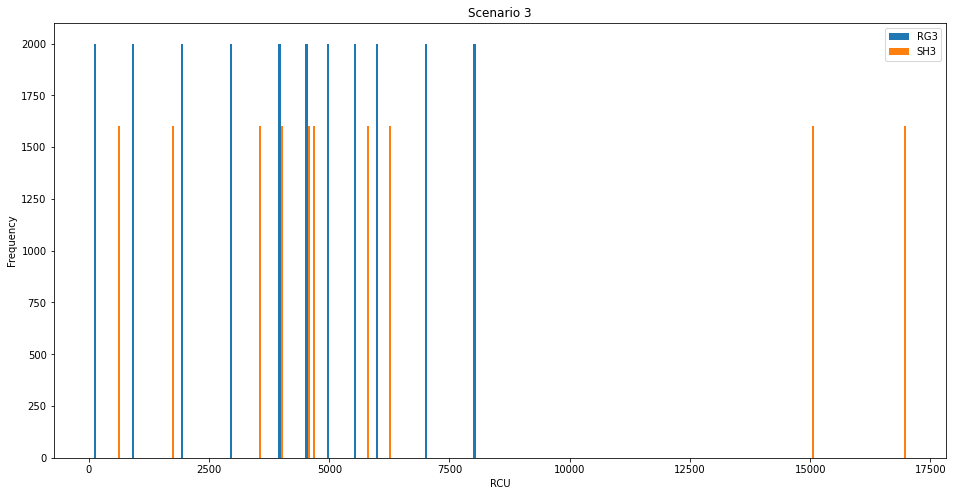

In [14]:
figure, ax = plt.subplots(figsize = (16,8))
plt.hist([RG3, SH3], bins = 150, label = ["RG3", "SH3"])
plt.title("Scenario 3")
plt.xlabel("RCU")
plt.ylabel("Frequency")  
plt.legend()

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [15]:
SH_alpha = 0.97
RG_alpha = 0.89

In [16]:
#SH
SH_rent = SH
SH_rent_mean = np.mean(SH_rent)
SH_rent_median = np.median(SH_rent)
SH_phi = np.array([9000, 10000, 10500, 11000, 11500, 12500, 13000, 14000, 16000, 17500])
SH_phi = np.repeat(SH_phi, SH_population / SH_phi.size)
SH_phi = np.sort(SH_phi)
SH_phi_mean = np.mean(SH_phi)
SH_phi_median = np.median(SH_phi)
print("SH_rent Population: {}, SH_rent Median: {}, SH_rent Mean: {}, SH_rent IQR: {}".format(SH_rent.size, SH_rent_median , SH_rent_mean, iqr(SH_rent)))
print("SH_phi Population: {}, SH_phi Median: {}, SH_phi Mean: {}, SH_phi IQR: {}".format(SH_phi.size, SH_phi_median , SH_phi_mean, iqr(SH_phi)))
SH_cov = np.cov(SH, SH_phi)[0,1]
SH_cov_formula = SH_alpha * ((np.sqrt(np.var((SH)))) * (np.sqrt(np.var((SH_phi)))))
SH_deviate = np.abs(1 - (SH_cov_formula/SH_cov))
print("SH_cov = {}, SH_cov_formula = {}, deviate = {}%".format(SH_cov, SH_cov_formula, SH_deviate))

SH_rent Population: 16000, SH_rent Median: 4600.0, SH_rent Mean: 6300.0, SH_rent IQR: 2700.0
SH_phi Population: 16000, SH_phi Median: 12000.0, SH_phi Mean: 12500.0, SH_phi IQR: 3500.0
SH_cov = 12655790.986936683, SH_cov_formula = 12801707.067418784, deviate = 0.011529589942874008%


In [17]:
#RG
RG_rent = RG
RG_rent_mean = np.mean(RG_rent)
RG_rent_median = np.median(RG_rent)
RG_phi = np.array([9000, 10000, 10500, 11000, 11500, 12500, 13000, 14000, 16000, 17500])
RG_phi = np.repeat(RG_phi, RG_population / RG_phi.size)
RG_phi = np.sort(RG_phi)
RG_phi_mean = np.mean(RG_phi)
RG_phi_median = np.median(RG_phi)
print("RG_rent Population: {}, RG_rent Median: {}, RG_rent Mean: {}, RG_rent IQR: {}".format(RG_rent.size, RG_rent_median , RG_rent_mean, iqr(RG_rent)))
print("RG_phi Population: {}, RG_phi Median: {}, RG_phi Mean: {}, RG_phi IQR: {}".format(RG_phi.size, RG_phi_median , RG_phi_mean, iqr(RG_phi)))
RG_cov = np.cov(RG, RG_phi)[0,1]
RG_cov_formula = RG_alpha * ((np.sqrt(np.var((RG)))) * (np.sqrt(np.var((RG_phi)))))
RG_deviate = np.abs(1 - (RG_cov_formula/RG_cov))
print("RG_cov = {}, RG_cov_formula = {}, deviate = {}%".format(RG_cov, RG_cov_formula, RG_deviate))

RG_rent Population: 22000, RG_rent Median: 4600.0, RG_rent Mean: 4200.0, RG_rent IQR: 4000.0
RG_phi Population: 22000, RG_phi Median: 12000.0, RG_phi Mean: 12500.0, RG_phi IQR: 3500.0
RG_cov = 5780262.739215419, RG_cov_formula = 5428562.277435895, deviate = 0.06084506494721409%


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

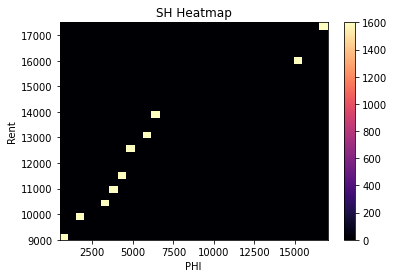

In [18]:
plt.hist2d(SH_rent, SH_phi, bins=32, cmap='magma')
plt.title("SH Heatmap")
plt.ylabel("Rent")
plt.xlabel("PHI")
plt.colorbar()
plt.show() 

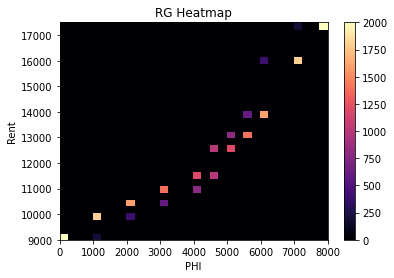

In [19]:
plt.hist2d(RG_rent, RG_phi, bins=32, cmap='magma')
plt.title("RG Heatmap")
plt.ylabel("Rent")
plt.xlabel("PHI")
plt.colorbar()
plt.show() 

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

In [20]:
def get_count_of_multinom(n = 20, p = [0.2, 0.1, 0.1, 0.1, 0.2, 0.3]):
    X = np.random.rand(n)
    prev_p_total = 0
    for i in range(len(p)):
        prev_p_total += p[i]
        X[X < prev_p_total] = i + 1
    X = (X - 1).astype(int)

    count = np.zeros_like(p).astype(int)
    for i in X:
        count[i] += 1
    return count


get_count_of_multinom()

array([0, 2, 2, 4, 5, 7])

In [21]:
def calc_emp_cent_Y(k = 100, n = 20, p = [0.2, 0.1, 0.1, 0.1, 0.2, 0.3]):
    y = 0
    for i in range(k):
        count = get_count_of_multinom(n, p)
        y += count[1] + count[2] + count[3] # Y = X2 + X3 + X4
    return y / k

ans3 = calc_emp_cent_Y()
print("The empirical centralized third moment of Y based on 100 experiments = {0}".format(ans3))

The empirical centralized third moment of Y based on 100 experiments = 5.82


in class we get that the centralized third moment in this case of Y = 6.
we get something close to 6, as we make k bigger we get closer and closer to the real answer that is 6.

### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

we know Var(X + Y) = Var(X) + Var(Y) + 2Cov(X,Y)
we know Cov(A+B,C) = Cov(A,C)+Cov(B,C)



var(X + Y + Z) = Var(X) + Var(Y + Z) + 2Cov(X,Y + Z) =
= Var(X) + Var(Y) + Var(Z) + 2Cov(Y,Z) + (2 * (Cov(X,Y)+Cov(X,Z))) = Var(X) + Var(Y) + Var(Z) + 2Cov(X,Y) + 2Cov(X,Z) + 2Cov(Y,Z)

if X,Y,Z are pairwise independent:

var(X + Y + Z) = Var(X) + Var(Y) + Var(Z) + 2Cov(X,Y) + 2Cov(X,Z) + 2Cov(Y,Z) = Var(X) + Var(Y) + Var(Z)

If X,Y,Z are pairwise independent, are they necessarily collectively independent?
answer: NO!
Let Ω={1,2,3,4}, and A=2Ω. Let P(i)=14, where i=1,2,3,4.

Let A={1,2}, B={1,3}, C={2,3}. Then A,B,C are pairwise independent but are not independent.

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [22]:
# we assume P = {key: prob}
def NFoldConv(P = {} , n = 2):
    return NFoldConvHelper(P, P, n)

def NFoldConvHelper(P_original = {}, Q_prev = {}, n = 2):
    if n <= 1:
        return Q_prev
  
    Q = {}
    if n > 1:
       keys_original = list(P_original.keys())
       probs_original = list(P_original.values())
       length_original = len(keys_original)
       keys_prev = list(Q_prev.keys())
       probs_prev = list(Q_prev.values())
       length_prev = len(keys_prev)

       for i in range(length_original):
           for j in range(length_prev):
               Q[keys_original[i] + keys_prev[j]] = Q.get((keys_original[i] + keys_prev[j]), 0) + probs_original[i] * probs_prev[j]

    return NFoldConvHelper(P_original, Q, n - 1)

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


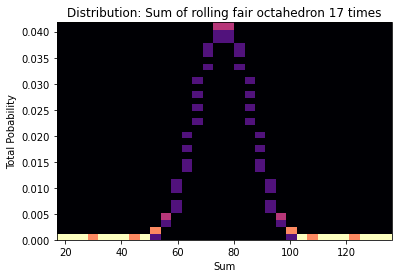

In [23]:
P = {1:1/8, 2:1/8, 3:1/8, 4:1/8, 5:1/8, 6:1/8, 7:1/8, 8:1/8}
Q = NFoldConv(P, 17)

plt.hist2d(list(Q.keys()), list(Q.values()), bins=32, cmap='magma')
plt.title('Distribution: Sum of rolling fair octahedron 17 times')
plt.xlabel('Sum')
plt.ylabel('Total Pobability')
plt.show()

### Question 6 - Counting Similar Strings

Define a probaility space $(\Omega, P)$:
* $\Omega = \{0,1\}^n$.
* $P$ is induced by independantly tossing a $p$-coin ($p \in [0,1]$) n times.

For $\omega \in \Omega$ let $W(\omega) =$ number of 1s in $\omega$.

For $\omega \in \Omega$ let the random variable $C = C_{p, n}$ be defined by:
$$C(\omega) = |\{\zeta : W(\zeta)=W(\omega)\}|$$

#### 6.A
Plot the distribution of $W$ for $n = 100$ and $p = 0.3$. What is the name of this distribution?

In [24]:
def fact(n = 2):
    arr = np.zeros(n + 1)
    arr[0] = 1
    arr[1] = 1
    for i in range(2, n + 1):
        arr[i] = arr[i - 1] * i
    return(arr)
        

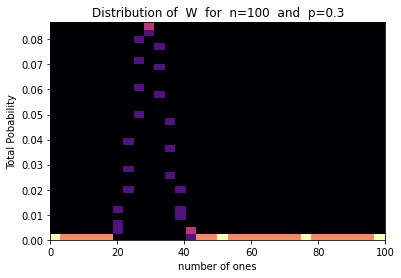

In [25]:
from scipy.stats import nbinom
from scipy.stats import binom
import math

def distribution_p_coin(n = 100, p = 0.3):
    W = np.zeros(n + 1)
    rv = binom(n, p)
    fact_arr = fact(n)
    for k in range(n):
        W[k] = (fact_arr[n] / (fact_arr[k] * fact_arr[n - k])) * math.pow(p, k) * math.pow(1 - p, n - k)
    #print(W)
    return W    

W = distribution_p_coin(100, 0.3)
plt.hist2d(range(0, 101), list(W), bins=32, cmap='magma')
plt.title('Distribution of  W  for  n=100  and  p=0.3')
plt.xlabel('number of ones')
plt.ylabel('Total Pobability')
plt.show()

#### 6.B
State a formula for comuting $E(C)$.

Compute $E(C)$ for $p=0.1, 0.5, 0.8$ and $n=10, 20, 50, 100$

In [26]:
def get_Ec(p = 0.1, n = 10):
    W = distribution_p_coin(n, p)
    E = 0
    fact_arr = fact(n)
    # E(C) = sigma(nCk * W[k])
    for k in range(n + 1):
        E = E + ((fact_arr[n] / (fact_arr[k] * fact_arr[n - k])) * W[k] )
    return E

P = [0.1, 0.5, 0.8]
N = [10, 20, 50, 100]
for p in P:
    for n in N:
        E = get_Ec(p, n)
        print("for p = {}, n = {} we get E(C) = {} ".format(p, n, E))

for p = 0.1, n = 10 we get E(C) = 22.575959534700008 
for p = 0.1, n = 20 we get E(C) = 1757.745847765875 
for p = 0.1, n = 50 we get E(C) = 1479309659.773231 
for p = 0.1, n = 100 we get E(C) = 1.6815694309212336e+19 
for p = 0.5, n = 10 we get E(C) = 180.4248046875 
for p = 0.5, n = 20 we get E(C) = 131460.69414043427 
for p = 0.5, n = 50 we get E(C) = 89609514959900.02 
for p = 0.5, n = 100 we get E(C) = 7.143018323803162e+28 
for p = 0.8, n = 10 we get E(C) = 66.84263393279997 
for p = 0.8, n = 20 we get E(C) = 16979.42059501013 
for p = 0.8, n = 50 we get E(C) = 490151964857.8015 
for p = 0.8, n = 100 we get E(C) = 2.0130081915278964e+24 


#### 6.C 
Plot the histograms of the values of $C$ for 1000 samples drawn from the space $(\Omega, P)$ for each combination of $p$ and $n$ from the previous section. <br>
Add text to each histogram with the empirical average of $C$ and the computed value of $E(C)$ (from the previous section). <br>
In every histogram indicate the values of $n$ and $p$. 

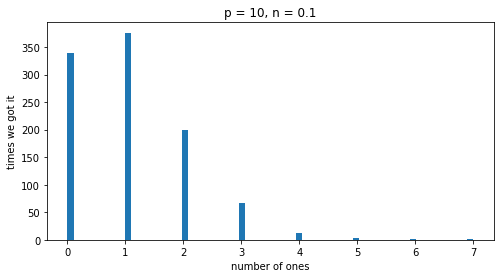

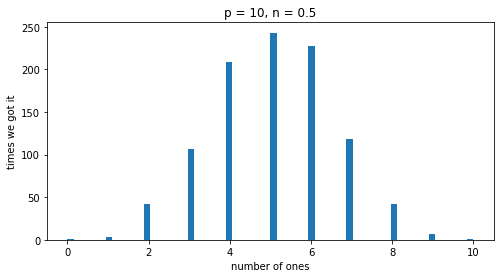

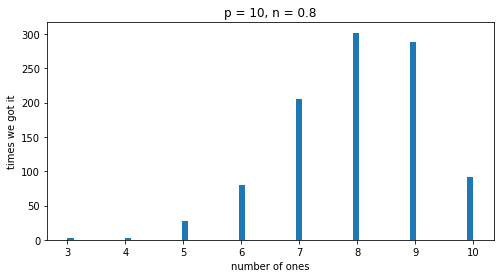

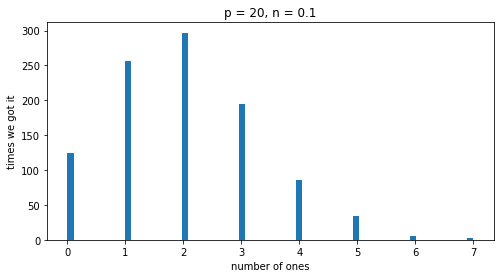

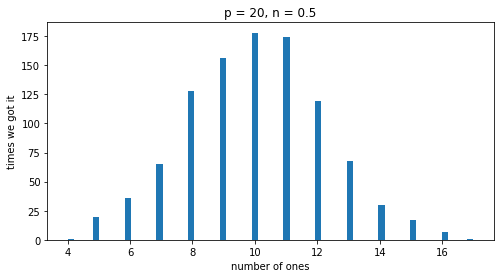

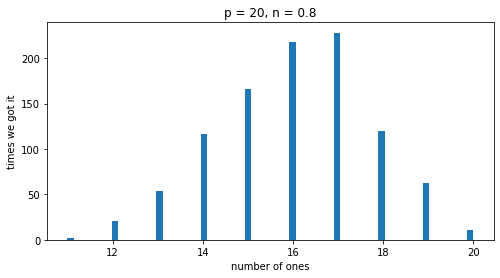

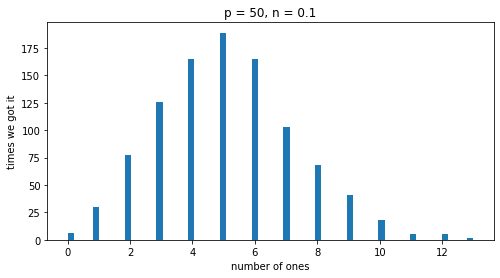

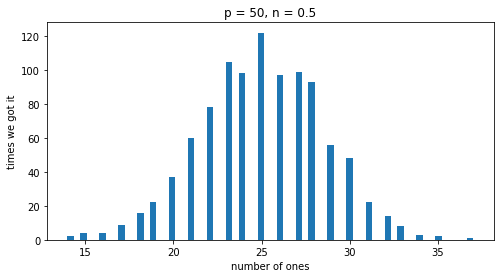

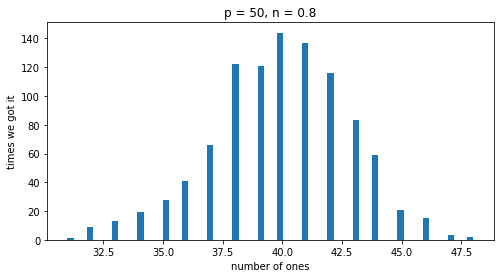

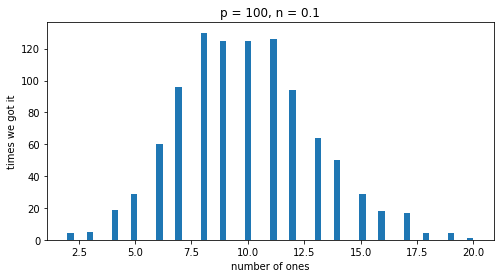

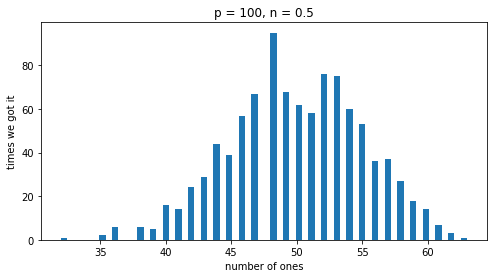

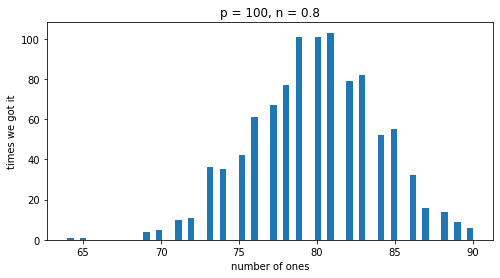

In [27]:
P = [0.1, 0.5, 0.8]
N = [10, 20, 50, 100]
def temp6c():
    for n in N:
        for p in P:
            binom = np.random.binomial(n, p, 1000)
            figure, ax = plt.subplots(figsize = (8,4))
            plt.title('p = {}, n = {}'.format(n, p))
            plt.xlabel('number of ones')
            plt.ylabel('times we got it')
            plt.hist(binom, bins=64)
temp6c()

#### 6.D
Use a scatter plot to compare the empirical and the computed values from the previous section

E(Binom) = 0.985, E = 22.575959534700008
E(Binom) = 4.953, E = 180.4248046875
E(Binom) = 7.987, E = 66.84263393279997
E(Binom) = 2.033, E = 1757.745847765875
E(Binom) = 10.03, E = 131460.69414043427
E(Binom) = 15.979, E = 16979.42059501013
E(Binom) = 5.027, E = 1479309659.773231
E(Binom) = 24.892, E = 89609514959900.02
E(Binom) = 40.192, E = 490151964857.8015
E(Binom) = 10.016, E = 1.6815694309212336e+19
E(Binom) = 49.867, E = 7.143018323803162e+28
E(Binom) = 80.122, E = 2.0130081915278964e+24


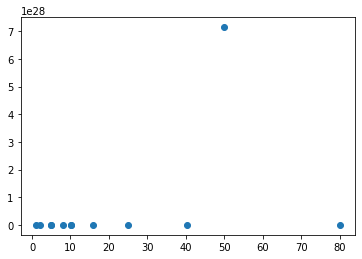

In [28]:
P = [0.1, 0.5, 0.8]
N = [10, 20, 50, 100]
ec1 = []
ec2 = []
def temp6d():
    for n in N:
        for p in P:
            binom = np.random.binomial(n, p, 1000)
            ec1.append(np.mean(binom))
            E = get_Ec(p, n)
            ec2.append(E)
            print("E(Binom) = {}, E = {}".format(np.mean(binom), E))
temp6d()
plt.scatter(ec1, ec2)
plt.show()